# 1.  Import Libraries

In [1]:
#importing necessary libraries

#import Pandas
import pandas as pd

#import Numpy
import numpy as np

#import seaborn
import seaborn as sns

#import matplotlib
import matplotlib.pyplot as plt

#to suppress warnings
from warnings import filterwarnings
filterwarnings("ignore")

## 2.  Read data

In [2]:
#Load dataset and read first five observations
df_Account=pd.read_csv("account_statement.csv")
df_Account.head()


,Date and Time,Narration,D,C,Available balance,Type
0,04-05-2022,Money Received using UPI\nReceived from: VORA ...,NaN,430.0,460.68,C
1,14-05-2022,Money Sent using UPI\nSent to: Shivshakti Fars...,100.00,NaN,360.68,D
2,02-06-2022,Interest Received\nReceived for the period 01-...,NaN,1.0,361.68,C
3,28-06-2022,Money Sent using UPI\nSent to: Bunch Microtech...,1.03,NaN,360.65,D
4,02-07-2022,Interest Received\nReceived for the period 01-...,NaN,1.0,361.65,C


## 3. Rename Columns

In [3]:
#renaming columns
df_Account.rename(columns={"Date and Time":"Date","D":"Withdrawal Amount","C":"Deposit Amount"},inplace=True)
df_Account.head()

,Date,Narration,Withdrawal Amount,Deposit Amount,Available balance,Type
0,04-05-2022,Money Received using UPI\nReceived from: VORA ...,NaN,430.0,460.68,C
1,14-05-2022,Money Sent using UPI\nSent to: Shivshakti Fars...,100.00,NaN,360.68,D
2,02-06-2022,Interest Received\nReceived for the period 01-...,NaN,1.0,361.68,C
3,28-06-2022,Money Sent using UPI\nSent to: Bunch Microtech...,1.03,NaN,360.65,D
4,02-07-2022,Interest Received\nReceived for the period 01-...,NaN,1.0,361.65,C


## 4. Change Datatype

In [4]:
#Convert Date column to date time datatype
df_Account["Date"]=pd.to_datetime(df_Account["Date"])


## 5. Missing value treatment

In [5]:
#Handling missing values
df_Account.fillna(0,inplace=True)

#Drop unnecessary columns
df_Account.drop(columns=["Type"],inplace=True)

In [6]:
df_Account.head()

,Date,Narration,Withdrawal Amount,Deposit Amount,Available balance
0,2022-04-05,Money Received using UPI\nReceived from: VORA ...,0.00,430.0,460.68
1,2022-05-14,Money Sent using UPI\nSent to: Shivshakti Fars...,100.00,0.0,360.68
2,2022-02-06,Interest Received\nReceived for the period 01-...,0.00,1.0,361.68
3,2022-06-28,Money Sent using UPI\nSent to: Bunch Microtech...,1.03,0.0,360.65
4,2022-02-07,Interest Received\nReceived for the period 01-...,0.00,1.0,361.65


In [7]:
#displaying columns
df_Account.columns

Index(['Date', 'Narration', 'Withdrawal Amount', 'Deposit Amount',
       'Available balance'],
      dtype='object')

## 6. Exploratory Data Analysis

In [8]:
#Total Income and ToTal Expenses
total_income=df_Account["Deposit Amount"].sum()
total_expense=df_Account["Withdrawal Amount"].sum()

print("Total_Income :",total_income)
print("Total_Expense :",total_expense)


Total_Income : 28284.0
Total_Expense : 28128.58


**Interpretation**:
- we can observe that there is not so much difference between my Total_expense and Total_income

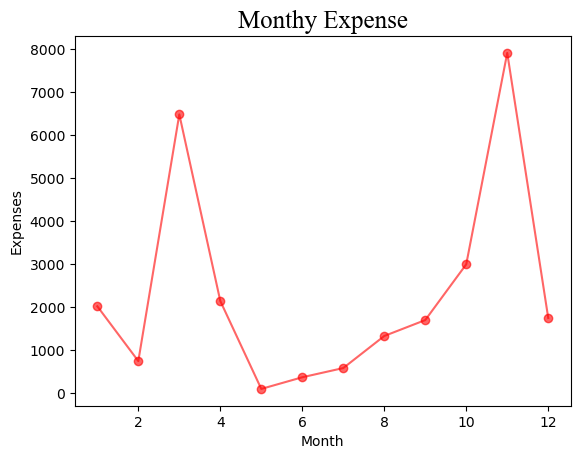

In [43]:
# Monthly spending pattern
monthly_expenses = df_Account.groupby(df_Account["Date"].dt.month)["Withdrawal Amount"].sum()
monthly_expenses.plot(color="Red",marker="o",alpha=0.6)
plt.title("Monthy Expense",fontname="Times New Roman",fontsize=18)
plt.xlabel("Month")
plt.ylabel("Expenses")
plt.show()

**Interpretation**:
- There is fluctuation in starting months from January to April then expense is continuously increasing from may till november and suddenly in december it reduces


In [10]:
# Major Expense
top_expense = df_Account.nlargest(5,"Withdrawal Amount")
top_expense

,Date,Narration,Withdrawal Amount,Deposit Amount,Available balance
73,2022-11-15,Money Sent using UPI\nSent to: Akshaykumar Man...,4820.0,0.0,441.10
125,2023-03-14,Money Sent using UPI\nSent to: Mobitech Creati...,3975.0,0.0,440.10
84,2022-04-12,Paid using your Bank Account\nPaid successfull...,1950.0,0.0,676.10
36,2022-01-10,Money Transferred\nSent to Paregi Jigar\nTrans...,1700.0,0.0,2087.37
69,2022-11-13,Money Sent using UPI\nSent to: AKSHAYKUMAR MAN...,1130.0,0.0,1190.10


**Interpretation**
- These are my top 5 expenses throughout the year

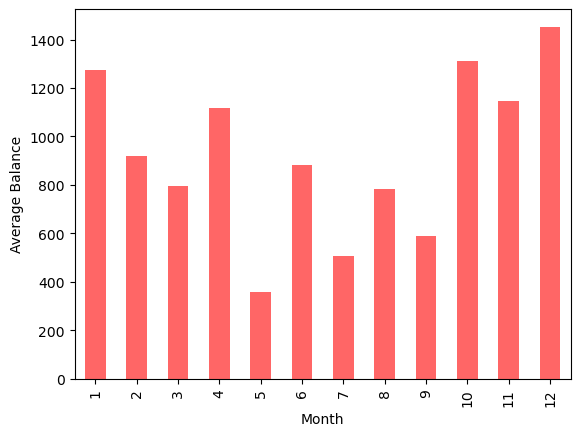

In [44]:
# Average Monthly Balance
df_Account["Month"] = df_Account["Date"].dt.month
average_monthly_balance = df_Account.groupby("Month")["Available balance"].mean()
average_monthly_balance.plot(kind="bar",color="red",alpha=0.6)
plt.xlabel("Month")
plt.ylabel("Average Balance")
plt.show()

**Interpretation**
- Avearge Monthly Balance is fluctuating over the whole year

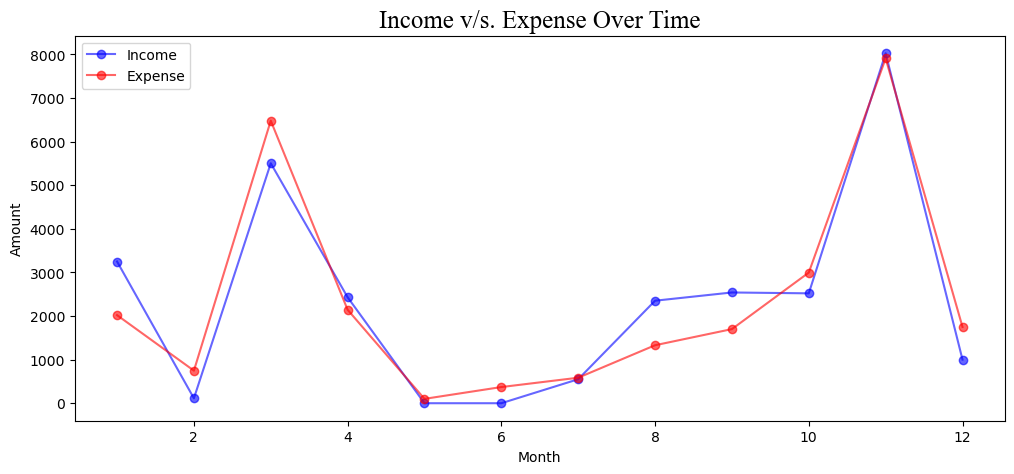

In [46]:
# Income v/s. Expense Over Time
# Visualize the trend of your income and expense over the months
monthly_income = df_Account.groupby("Month")["Deposit Amount"].sum()
monthly_expenses = df_Account.groupby("Month")["Withdrawal Amount"].sum()
plt.figure(figsize=(12,5))

#plot for income
plt.plot(monthly_income.index,monthly_income,label="Income",marker="o",color="blue",alpha=0.6)

#plot for expense
plt.plot(monthly_expenses.index,monthly_expenses,label="Expense",marker="o",color="red",alpha=0.6)

#setting labels
plt.title("Income v/s. Expense Over Time",fontname="Times New Roman",fontsize=18)
plt.xlabel("Month")
plt.ylabel("Amount")
plt.legend()
plt.show()

**Interpretation**:
- We can observe that income and expense are almost equal 

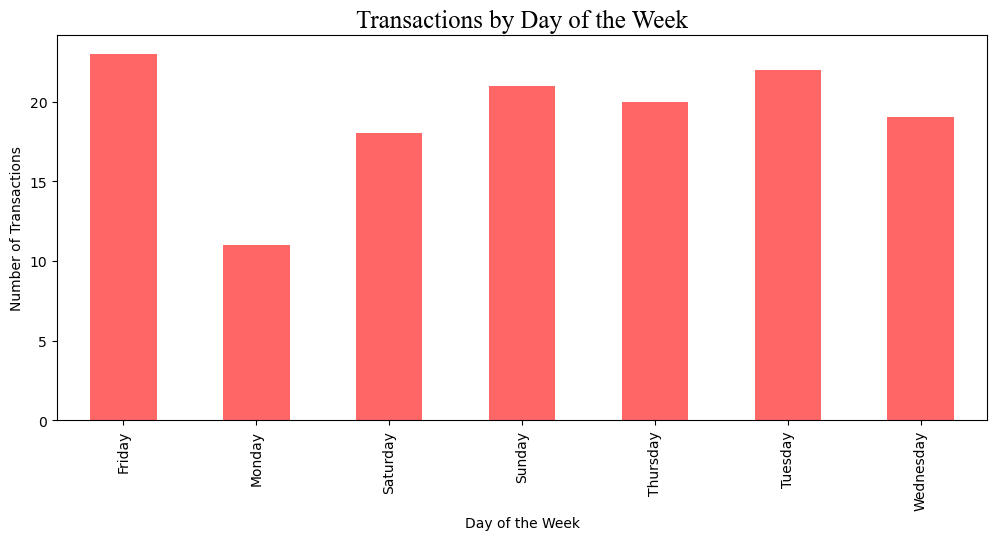

In [41]:
# Pattern according to Day of Week
df_Account["Day_of_Week"] = df_Account["Date"].dt.day_name()
days_transaction = df_Account.groupby("Day_of_Week").size()

plt.figure(figsize=(12,5))
days_transaction.plot(kind="bar",color="Red",alpha=0.6)
plt.xlabel('Day of the Week')
plt.ylabel('Number of Transactions')
plt.title('Transactions by Day of the Week',fontname="Times New Roman",fontsize=18)
plt.show()

**Interpretation**:
- During day of week mostly transactions happened on Friday 

In [14]:
# Top Income Sources
top_income = df_Account.nlargest(5,"Deposit Amount")
top_income

,Date,Narration,Withdrawal Amount,Deposit Amount,Available balance,Month,Day_of_Week
72,2022-11-15,Money Received using UPI\nReceived from: CHITA...,0.0,4820.0,5261.10,11,Tuesday
124,2023-03-14,Money Received using UPI\nReceived from: RAJEN...,0.0,4000.0,4415.10,3,Tuesday
35,2022-01-10,Money Received using UPI\nReceived from: CHITA...,0.0,2500.0,3787.37,1,Monday
83,2022-04-12,Money Received using UPI\nReceived from: RAJEN...,0.0,2000.0,2626.10,4,Tuesday
68,2022-11-13,Money Received using UPI\nReceived from: Chita...,0.0,1130.0,2320.10,11,Sunday


**Interpretation**:
- These are my top 5 deposited Amount

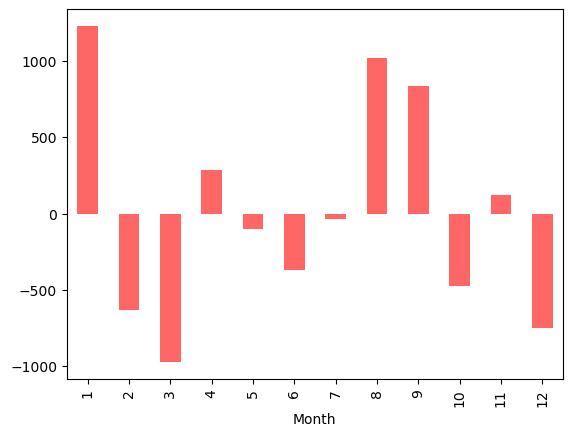

In [49]:
# Net cash flow
# calculate net cash flow for each month
df_Account["Net Cash Flow"] = df_Account["Deposit Amount"] - df_Account["Withdrawal Amount"]
monthly_cash_flow = df_Account.groupby("Month")["Net Cash Flow"].sum()
monthly_cash_flow.plot(kind="bar",color="red",alpha=0.6)
plt.show()

**Interpretation**:
- Using Net cash flow we can interpret that only during January, August and Septembermonth amount is deposited and during all other months there is only expense 

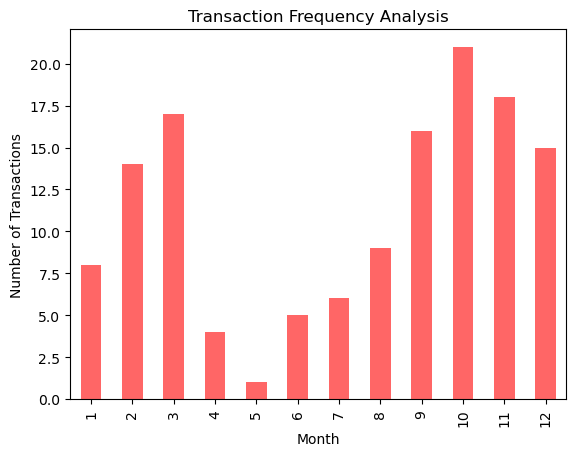

In [50]:
# Transaction frequency Analysis
transaction_frequency = df_Account.groupby("Month").size()

transaction_frequency.plot(kind="bar",color="red",alpha=0.6)
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.title('Transaction Frequency Analysis')
plt.show()


**Interpretation**:
- Maximum Number of Transactions happened in month of october and minimum number of transactions happened in month of may

Text(0, 0.5, 'Expense')

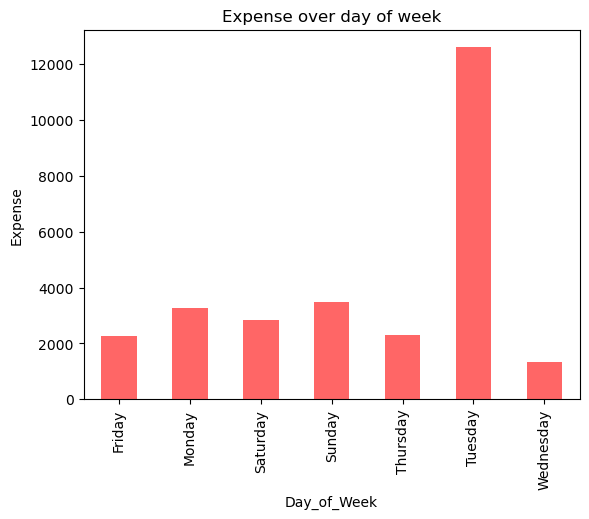

In [51]:
#Expeense by day of week
expense_day_of_week=df_Account[df_Account["Withdrawal Amount"] > 0].groupby("Day_of_Week")["Withdrawal Amount"].sum()
expense_day_of_week.plot(kind="bar",color="red",alpha=0.6)
plt.title("Expense over day of week")
plt.ylabel("Expense")

**Interpretation**:
- Mostly expense done on Tuesday

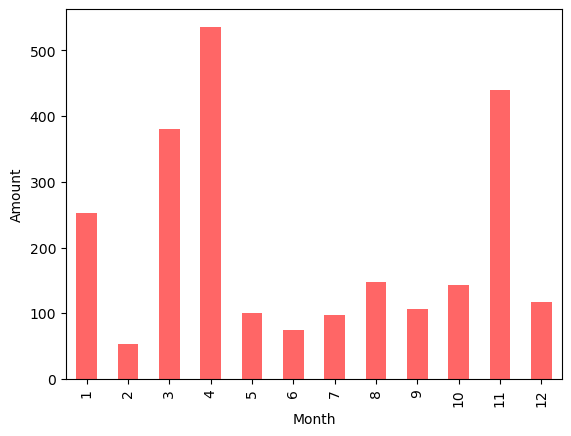

In [52]:
#average wihdrawal and deposit amount
average_withdrawal=df_Account.groupby("Month")["Withdrawal Amount"].mean()
average_deposit=df_Account.groupby("Month")["Deposit Amount"].mean()
average_withdrawal.plot(kind="bar",color="red",alpha=0.6)
plt.ylabel("Amount")

plt.show()

**Interpretation**:
- Above Plot shows that during april and november month maximum amount is withdrawal from account over the years

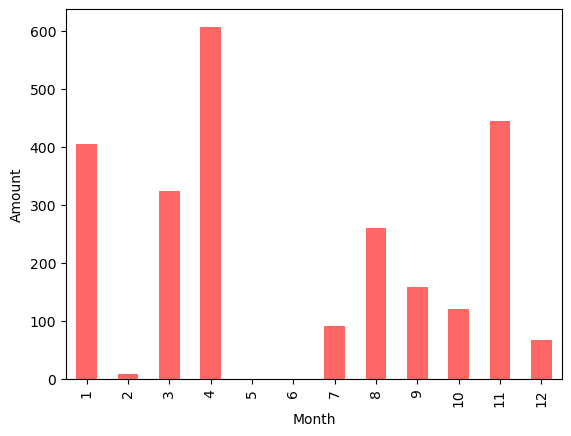

In [54]:
average_deposit.plot(kind = "bar",color = "red",alpha=0.6)
plt.ylabel("Amount")
plt.show()

**Interpretation**:
- Above plot shows that during february,may and june there is less or no money deposited in account

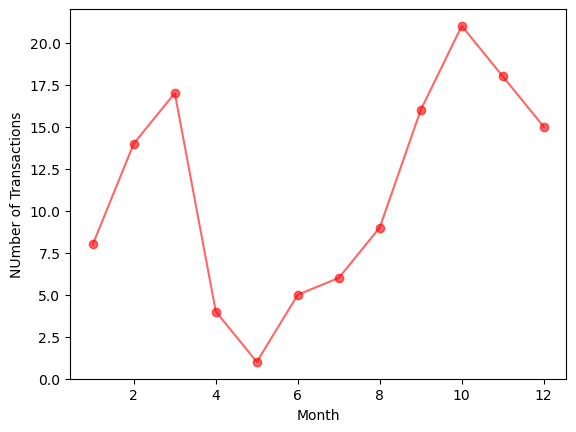

In [55]:
#Number of Transactions over Month
monthly_transaction_count = df_Account.groupby("Month").size()
monthly_transaction_count.plot(marker="o",color="red",alpha=0.6)
plt.ylabel("NUmber of Transactions")
plt.show()

**Interpretation**:
- If see graph carefully so we can interpret that starting from may month there is sudden increase in number of transactions

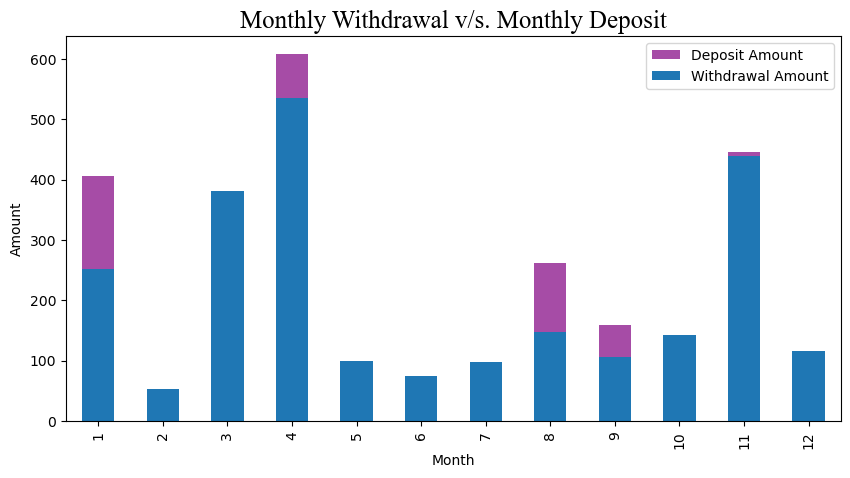

In [60]:
#Monthly Withdrawal v/s. Monthly Deposit

monthly_withdrawal=df_Account.groupby("Month")["Withdrawal Amount"].mean()
monthly_deposit=df_Account.groupby("Month")["Deposit Amount"].mean()
plt.figure(figsize=(10,5))
monthly_deposit.plot(kind = "bar",color = "purple",alpha=0.7)
monthly_withdrawal.plot(kind="bar")
plt.title("Monthly Withdrawal v/s. Monthly Deposit",font="Times New Roman",fontsize=18)
plt.ylabel("Amount")
plt.legend()
plt.show()

**Interpretaion**:
- In feb,march,may,june,july,oct,dec no amount is deposited

In [22]:
bank_statement = df_Account

average daily expense: Month
1     505.000000
2      67.909091
3     647.900000
4     714.333333
5     100.000000
6      92.757500
7     195.000000
8     266.000000
9     188.888889
10    299.627000
11    790.828000
12    159.000000
Name: Withdrawal Amount, dtype: float64


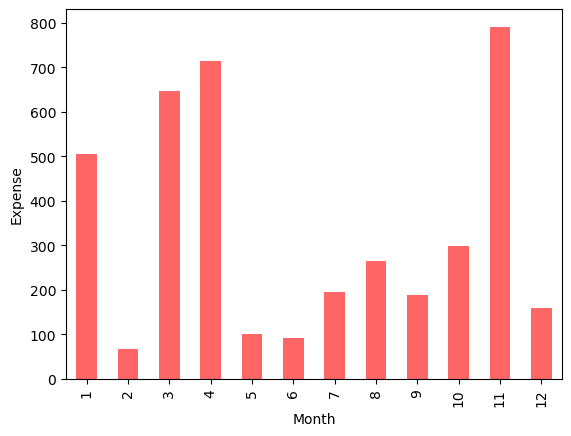

In [61]:
#Average Daily Expense
bank_statement["Day"] = bank_statement["Date"].dt.day
daily_expense = bank_statement.groupby(["Month","Day"])["Withdrawal Amount"].sum().reset_index()
average_daily_expense = daily_expense.groupby("Month")["Withdrawal Amount"].mean()
print("average daily expense:",average_daily_expense)
average_daily_expense.plot(kind = "bar",color="red",alpha=0.6)
plt.ylabel("Expense")
plt.show()

**Interpretation**:
- During February, August, October, November Months higher average daily expenses is higher 
- During April and May Months there is lower average daily expenses 

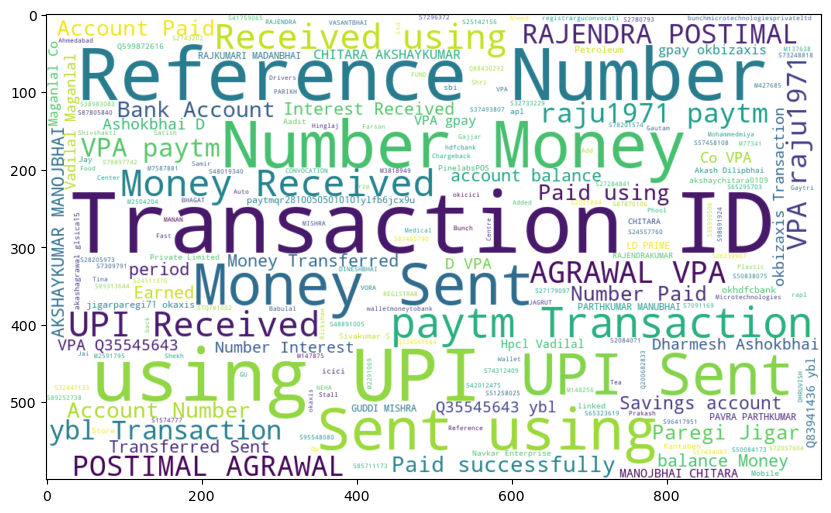

In [24]:
# Transaction description word count
from wordcloud import WordCloud

narration_words = " ".join(bank_statement["Narration"].astype(str))
wordcloud = WordCloud(width=1000,height=600,background_color="white").generate(narration_words)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud,interpolation='bilinear')
# plt.axis("off")

monthly_saving: Month
1     1230.00
2     -634.00
3     -976.00
4      287.00
5     -100.00
6     -371.03
7      -35.00
8     1021.00
9      840.00
10    -476.27
11     118.72
12    -749.00
dtype: float64


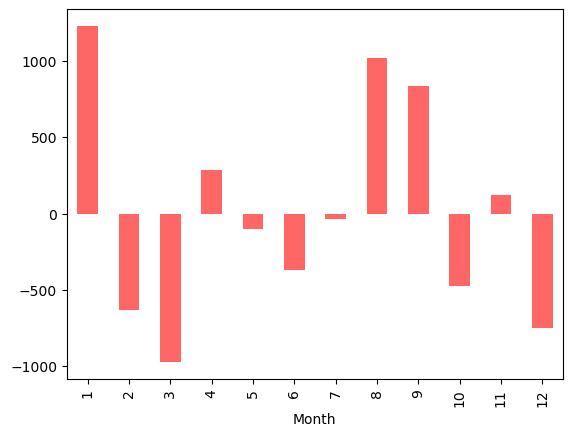

In [62]:
#monthly savings
monthly_saving = monthly_income - monthly_expenses
print("monthly_saving:",monthly_saving)
monthly_saving.plot(kind="bar",color="red",alpha=0.6)
plt.show()

**Interpretation**:
- Here Positive savings in Months January, April, August, September, and November indicate that I have surplus income

- Negative savings in Months February, March, May, June, July, October, and December indicate that I have spent more than earned during those months

In [26]:
#largest income and largest deposit
largest_income = bank_statement.nlargest(1,"Deposit Amount")
largest_expense = bank_statement.nlargest(1,"Withdrawal Amount")
largest_income

,Date,Narration,Withdrawal Amount,Deposit Amount,Available balance,Month,Day_of_Week,Net Cash Flow,Day
72,2022-11-15,Money Received using UPI\nReceived from: CHITA...,0.0,4820.0,5261.1,11,Tuesday,4820.0,15


In [27]:
largest_expense

,Date,Narration,Withdrawal Amount,Deposit Amount,Available balance,Month,Day_of_Week,Net Cash Flow,Day
73,2022-11-15,Money Sent using UPI\nSent to: Akshaykumar Man...,4820.0,0.0,441.1,11,Tuesday,-4820.0,15


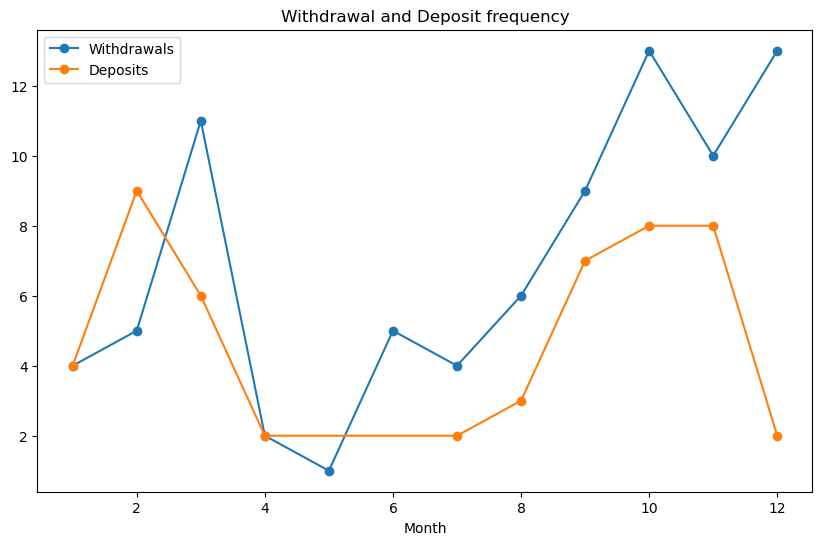

In [28]:
#withdrawal and deposit frequency
withdrawal_frequency = bank_statement[bank_statement["Withdrawal Amount"] > 0].groupby("Month").size()
deposit_frequency = bank_statement[bank_statement["Deposit Amount"] > 0].groupby("Month").size()

plt.figure(figsize=(10, 6))
withdrawal_frequency.plot(marker="o",label='Withdrawals')
deposit_frequency.plot(marker="o",label='Deposits')
plt.title("Withdrawal and Deposit frequency")
plt.legend()
plt.show()

**Interpretation**:
- If we compare withdrawal and deposit so we interpret that Withdraw is more than what I deposit in account

<BarContainer object of 134 artists>

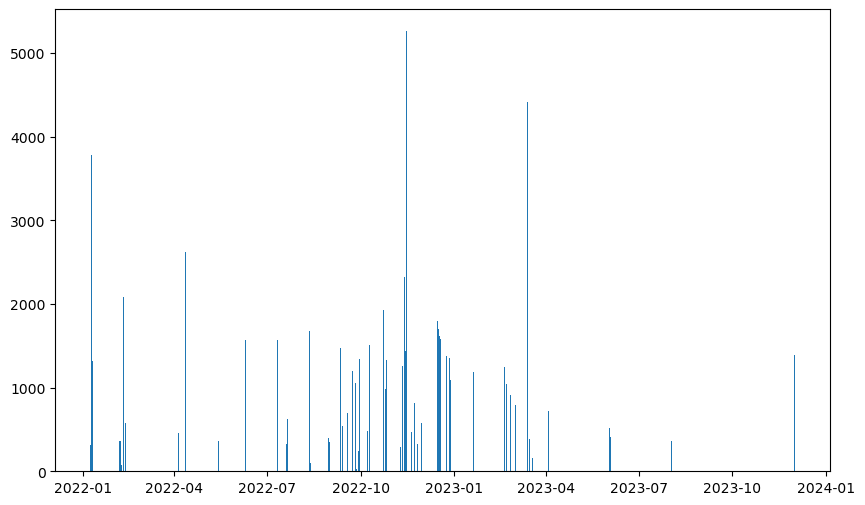

In [29]:
#balance vs timeplot
plt.figure(figsize=(10,6))
plt.bar(bank_statement["Date"],bank_statement["Available balance"])

**Interpretation**:
- From year 2022 month 9 to year 2022 month 12 I have maximum Balance

In [30]:
#expense vs income ratio
expense_income_ratio = total_expense / total_income
print("expense_income_ratio",expense_income_ratio)

expense_income_ratio 0.9945050205062934


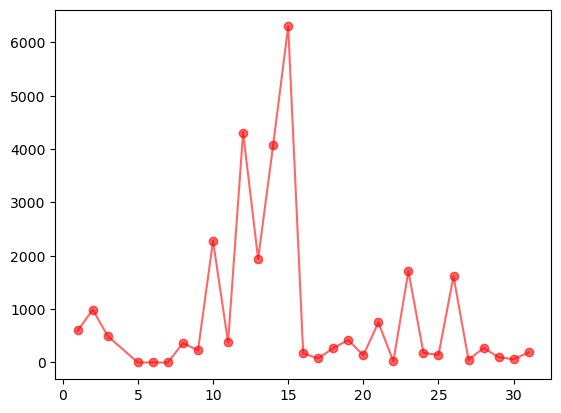

In [64]:
# expense by day of month
expense_day_of_month = bank_statement.groupby(bank_statement["Date"].dt.day)["Withdrawal Amount"].sum()
plt.plot(expense_day_of_month.index,expense_day_of_month,marker="o",color="red",alpha=0.6)
plt.show()

**Interpretation**:
- On days like 5, 6, 7 have no expenses 
- Also on days like 10,12,13,14,15 there is very high expenses, while others have lower expense


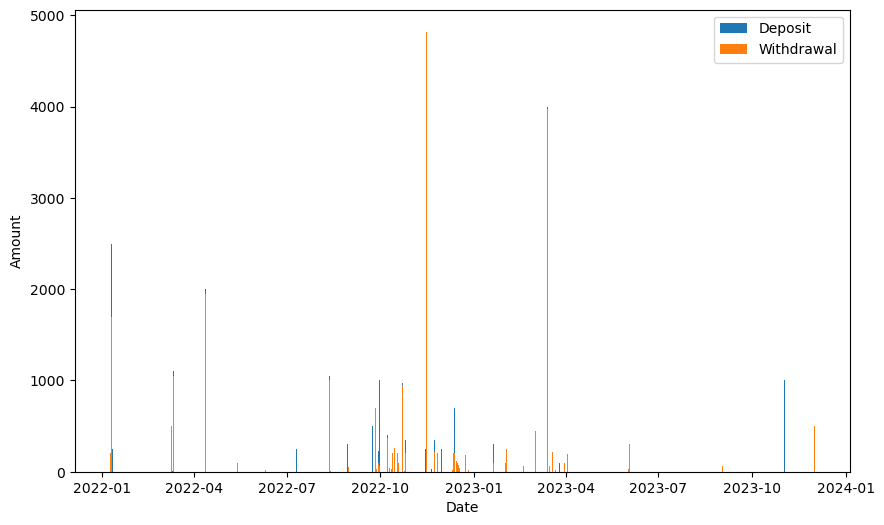

In [32]:
# deposit and withdrwal trends over time
plt.figure(figsize=(10,6))
plt.bar(bank_statement["Date"],bank_statement["Deposit Amount"],label="Deposit")
plt.bar(bank_statement["Date"],bank_statement["Withdrawal Amount"],label="Withdrawal")
plt.xlabel("Date")
plt.ylabel("Amount")
plt.legend()
plt.show()

**Interpretation**:
- In year 2022 month 11 and year 2023 month 3 maximum amount is withdraw from account

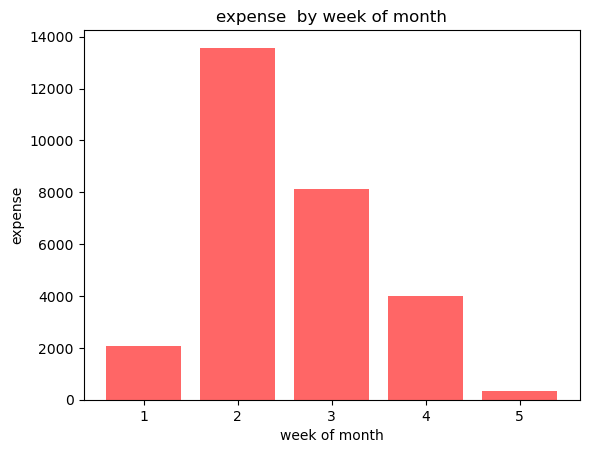

In [65]:
#expense by week of month
week_of_month = bank_statement["Date"].apply(lambda x:(x.day - 1) // 7 + 1)
expense_by_week_of_month = bank_statement.groupby(week_of_month)["Withdrawal Amount"].sum()
plt.bar(expense_by_week_of_month.index,expense_by_week_of_month,color="red",alpha=0.6)
plt.xlabel("week of month")
plt.ylabel("expense")
plt.title("expense  by week of month")
plt.show()

**Interpretation**:
- Maximum Expense done in 2nd week of month and minimum expense donw in 5th week of month

Date
1     9246.00
2     2614.03
3     3615.00
4    12653.55
Name: Withdrawal Amount, dtype: float64


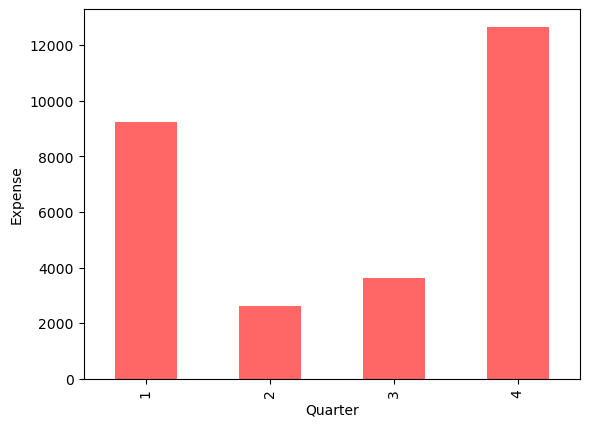

In [67]:
#quarterly expense
quarter_expense = bank_statement.groupby(bank_statement["Date"].dt.quarter)["Withdrawal Amount"].sum()
quarter_expense.plot(kind="bar",color="red",alpha=0.6)
plt.xlabel("Quarter")
plt.ylabel("Expense")
print(quarter_expense)

# plt.bar(quarter_expense.index,quarter_expense)

**Interpretation**:
- In 1st quarter there is expenses of amount 9246
- In 2nd quarter there is lowest expenses of amount 2614
- In 3rd quarter expense amount is 3615
- In 4th quarter there is highest expenses of amount 12653.55